# Loan Prediction III - Analytics Vidhya
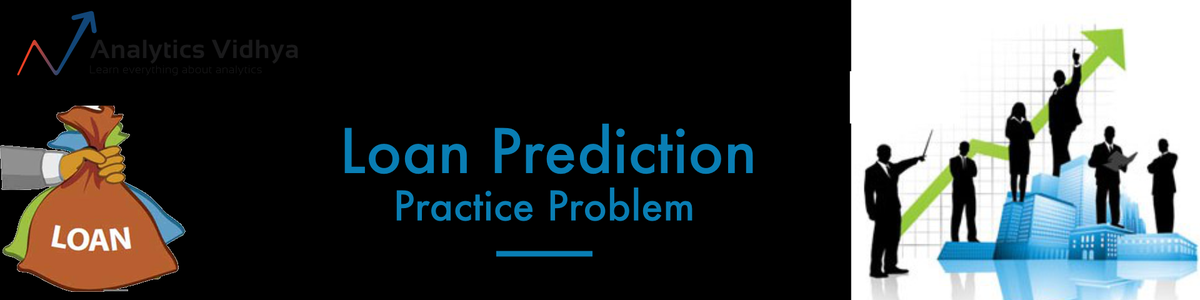

### Competition URL: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## Problem Statement
 Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. 
 Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem:
 Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
  application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, 
  Credit History and others. To automate this process, they have given a problem to identify the customers segments, 
  those are eligible for loan amount so that they can specifically target these customers. 
  Here they have provided a partial data set

In [1]:
# First let's import the libraries we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data loading and overview

In [2]:
# Load train data set and take a quick look at it
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Checking the number of rows and columns in this dataset (614 rows, 13 columns)
train.shape, test.shape

((614, 13), (367, 12))

There are only 614 samples in the training data set, which can probably be a challenge for us to train models.

Let's now explore each column one by one.



Let's also give each variable a brief definition and explore their data types:

**Loan_ID**: Unique Loan ID

**Gender**: Applicant's gender: Male / Female

**Married**: Is the applicant married? (Y/N) -> Yes / No

**Dependents**: Number of dependents the applicant has

**Education**: Applicant's education (Graduate / Under Graduate)

**Self_Employed**: Is the applicant self-employed? (Y/N) -> Yes / No

**ApplicantIncome**: Applicant's income _monthly_.
 The currency is not given by Analytics Vidhya as it is irrelevant. But let's assume the values are in US Dollars ($)

**CoapplicantIncome**: Coapplicant's income _monthly_ (in US Dollars $)

**LoanAmount**: Loan amount _in thousands_ (**OBS:** In **thousands** of US Dollars $)

**Loan_Amount_Term**: Term of loan _in months_
  A term loan is a loan from a bank for a specific amount that has a specified repayment schedule and either a fixed or floating interest rate. A term loan is often appropriate for an established small business with sound financial statements and the ability to make a substantial down payment to minimize payment amounts and the total cost of the loan. (Read more at [Investopedia](https://www.investopedia.com/terms/t/termloan.asp))

**Credit_History**: Does credit history meet guidelines? (1.0/0.0) -> Yes / No

**Property_Area**: Category of the property area based on its location: Urban / Semi Urban / Rural

**Loan_Status**: Was the loan approved (Y/N) -> Yes / No
  This is the variable we are trying to predict in this competition.

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can also see the number of rows that have NA values for each column

In [5]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 As we can see, we have information about all applicants' education status, income (and their coapplicants), and property area (urban/ semi urban / rural).
 Curiosly, 22 applicants did not specify the loan amount they desire.
 Besides, 50 applicants out of 614 do not have credit history information, which can be a problem for us to decide if they meet the guideline to get a loan or not.

## Handling Missing Values

### SimpleImputer

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#IterativeImputer().fit_transform(train)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent") # Inputs the most frequent value of each column
imp = imp.fit_transform(train)
imp[1]
imp_df = pd.DataFrame.from_records(imp)
imp_df.columns = train.columns.values
imp_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Random Forest

## Analysing each variable

### Loan_ID

In [7]:
# The 'Loan_ID' column does not give us relevant information for predicting if a loan should be approved or not, so we can just drop it from both data sets.
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

Before we move on to the following variables listed in the order of the data frame columns, let's change a few details to make the data set more _concise_ and to produce better data visualisations.

First, from the Data description in the competition web page, the **LoanAmount** column's data is in _thousands_ of US Dollars, whereas those for **ApplicantIncome** and **CoapplicantIncome** are in US Dollars. We can change this by simply multiplying all the values in the LoanAmount column by 1,000.

In [8]:
train['LoanAmount'] = train['LoanAmount'].map(lambda x:x*1000)
test['LoanAmount'] = test['LoanAmount'].map(lambda x:x*1000);

A glimpse of the change made:

In [9]:
train.LoanAmount.head(10)

0         NaN
1    128000.0
2     66000.0
3    120000.0
4    141000.0
5    267000.0
6     95000.0
7    158000.0
8    168000.0
9    349000.0
Name: LoanAmount, dtype: float64

Second, let's apply a log transformation to the following columns in both data sets: **LoanAmount**, **ApplicantIncome** and **CoapplicantIncome** as they are all right skewed, as seen in the plots below.

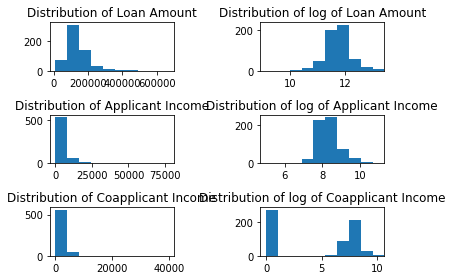

In [10]:
# 3 rows, 2 columns, 1st graph (and so on)...
plt.subplot(3, 2, 1)
plt.hist(train['LoanAmount'])
plt.xlim(right=train['LoanAmount'].max())
plt.title('Distribution of Loan Amount')

plt.subplot(3, 2, 2)
plt.hist(np.log1p(train['LoanAmount']))
plt.xlim(right=np.log1p(train['LoanAmount']).max())
plt.title('Distribution of log of Loan Amount')

plt.subplot(3, 2, 3)
plt.hist(train['ApplicantIncome'])
plt.xlim(right=train['ApplicantIncome'].max())
plt.title('Distribution of Applicant Income')

plt.subplot(3, 2, 4)
plt.hist(np.log1p(train['ApplicantIncome']))
plt.xlim(right=np.log1p(train['ApplicantIncome']).max())
plt.title('Distribution of log of Applicant Income')

plt.subplot(3, 2, 5)
plt.hist(train['CoapplicantIncome'])
plt.xlim(right=train['CoapplicantIncome'].max())
plt.title('Distribution of Coapplicant Income')


plt.subplot(3, 2, 6)
plt.hist(np.log1p(train['CoapplicantIncome']))
plt.xlim(right=np.log1p(train['CoapplicantIncome']).max())
plt.title('Distribution of log of Coapplicant Income')

plt.tight_layout()
plt.show()

The histogram for the distribution of log of Coapplicant Income is bimodal because the 'Coapplicant' variable has many inputs with the '0' value, which happens when there is not a coapplicant for that applicant.
We can also show how the distribution for this variable will look like after we apply a log transformation if we exclude the rows that contain a '0' value.
The transformation will work as expected, as the data will be approximated to normality.

Text(0.5, 1.0, 'Distribution of log of Coapplicant Income')

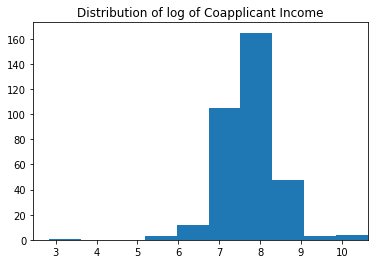

In [11]:
# Excludes all the rows that have a '0' value for the 'CoapplicantIncome' variable
coapplicant_without_zeros = train[train['CoapplicantIncome']!=0]

plt.hist(np.log1p(coapplicant_without_zeros['CoapplicantIncome']))
plt.xlim(right=np.log1p(coapplicant_without_zeros['CoapplicantIncome']).max())
plt.title('Distribution of log of Coapplicant Income')

For now, let's add the log-transformed variables to both data sets.

In [12]:
train['log_LoanAmount'] = np.log1p(train['LoanAmount'])
test['log_LoanAmount'] = np.log1p(test['LoanAmount'])
train['log_ApplicantIncome'] = np.log1p(train['ApplicantIncome'])
test['log_ApplicantIncome'] = np.log1p(test['ApplicantIncome'])
train['log_CoapplicantIncome'] = np.log1p(train['CoapplicantIncome'])
test['log_CoapplicantIncome'] = np.log1p(test['CoapplicantIncome'])

# Drop the non-transformed columns
train = train.drop(columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'])
test = test.drop(columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'])

### Gender

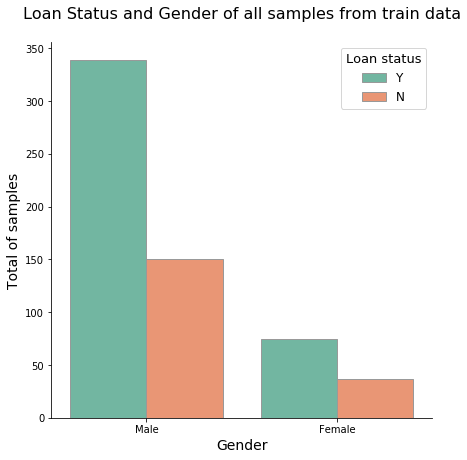

In [13]:
# Grouped barplot correlating Gender and Loan_Status

loan_status_gender_count = sns.catplot(x='Gender', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Gender of all samples from train data\n", fontsize=16)
loan_status_gender_count.set_xlabels('Gender', fontsize=14)
loan_status_gender_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [14]:
male_approved = train[(train.Gender == 'Male') &  (train.Loan_Status == 'Y')]
male_denied = train[(train.Gender == 'Male') &  (train.Loan_Status == 'N')]
female_approved = train[(train.Gender == 'Female') &  (train.Loan_Status == 'Y')]
female_denied = train[(train.Gender == 'Female') &  (train.Loan_Status == 'N')]

male_rate = (len(male_approved.index) / (len(male_approved.index) + len(male_denied.index)))
female_rate = (len(female_approved.index) / (len(female_approved.index) + len(female_denied.index)))

print('The proportion of approved male applicants is %.2f and that of female applicants is %.2f' % (male_rate, female_rate))

The proportion of approved male applicants is 0.69 and that of female applicants is 0.67


Let's also check the proportion for the 13 applicants that did not specify their gender in the application

In [15]:
null_gender = train[train['Gender'].isnull()]
null_gender.sort_values(by='Loan_Status')

null_approved = null_gender[(null_gender.Loan_Status == 'Y')]
null_denied = null_gender[(null_gender.Loan_Status == 'N')]

null_rate = (len(null_approved.index) / (len(null_approved.index) + len(null_denied.index)))

print('The proportion of approved non-specified gender applicants is %.2f' % (null_rate))

# The data for the applicants that did not reveal their gender
# null_gender

The proportion of approved non-specified gender applicants is 0.62


With the plot and the proportions presented above, we can see that the gender of an applicant alone does not seem to influence the company's decision to loan them money.

The scatterplot below also provides us with the same insight, but also gives us new important information:
  1. Applicants demand for a loan amount that is much greater than their incomes;
  2. There is a positive correlation between the loan amount requested by an applicant and their income for both genders.

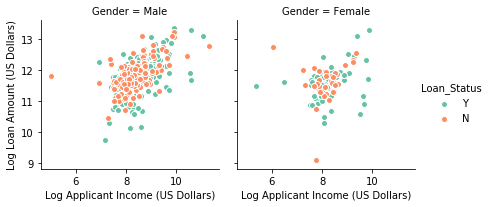

In [16]:
g = sns.FacetGrid(train, col="Gender", hue="Loan_Status", palette="Set2")
g = g.map(plt.scatter, "log_ApplicantIncome", "log_LoanAmount", edgecolor="w").add_legend()
g.set_axis_labels("Log Applicant Income (US Dollars)", "Log Loan Amount (US Dollars)")

With the plot and the proportions presented above, we can see that the gender of an applicant alone does not seem to influence the company's decision to loan them money.

### Married

  For this column we can do a similar analysis and data visualisation as the Gender one, as it only has two possible values       ('Yes' or 'No'), plus the 3 applicants that did not specify their marital status.

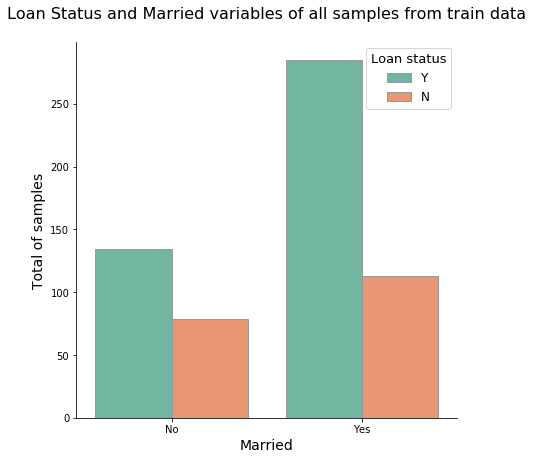

In [17]:
# Grouped barplot correlating Married and Loan_Status

loan_status_gender_count = sns.catplot(x='Married', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Married variables of all samples from train data\n", fontsize=16)
loan_status_gender_count.set_xlabels('Married', fontsize=14)
loan_status_gender_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [18]:
married_approved = train[(train.Married == 'Yes') &  (train.Loan_Status == 'Y')]
married_denied = train[(train.Married == 'Yes') &  (train.Loan_Status == 'N')]
nonmarried_approved = train[(train.Married == 'No') &  (train.Loan_Status == 'Y')]
nonmarried_denied = train[(train.Married == 'No') &  (train.Loan_Status == 'N')]

married_rate = (len(married_approved.index) / (len(married_approved.index) + len(married_denied.index)))
nonmarried_rate = (len(nonmarried_approved.index) / (len(nonmarried_approved.index) + len(nonmarried_denied.index)))

print('The proportion of approved married applicants is %.2f and that of non-married applicants is %.2f' % (married_rate, nonmarried_rate))

The proportion of approved married applicants is 0.72 and that of non-married applicants is 0.63


This time, unlike the difference in proportions with the Gender variable, we can see that **there might be a correlation** between the marital status of the applicant and their loan status decision by the company. Married applicants have a greater rate of approval than non-married applicants.

A Violin plot that also includes the log of the loan amounts demanded by each applicant can give us more insight:

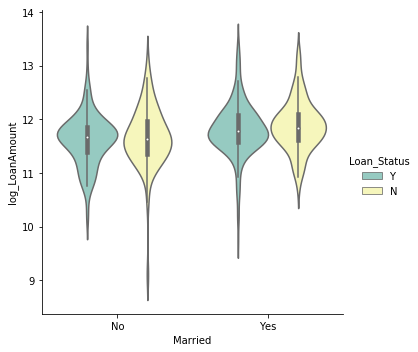

In [19]:
g = sns.catplot(x="Married", y="log_LoanAmount", hue="Loan_Status", data=train, kind="violin", palette="Set3")

It is noticeable that there _is not_ a big difference between the loan amount values for applicants that got accepted or rejected in any of the two "Married" subgroups. 

This implies that it is not the loan amount itself that creates the discrepancy of proportion rates we calculated above.

In fact, applicants who are married tend to ask for a _greater_ loan amount than those are not married.

However, what if married applicants tend to have higher income than those are not married? We've already seen that there is a positive correlation between the applicant's income and it's loan amount, which can also influence on the loan status decision.

According to the violin plot below, that is not the case. Applicants who are married and those who are not DO NOT have a relevant gap in their salaries.

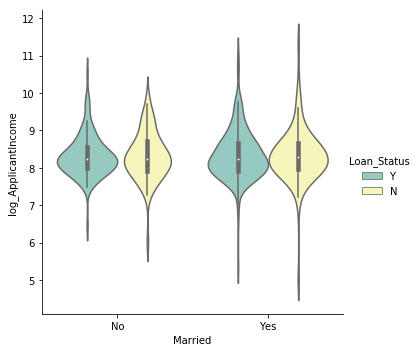

In [20]:
sns.catplot(x="Married", y="log_ApplicantIncome", hue="Loan_Status", data=train, kind="violin", palette="Set3")

Therefore, an applicant's _marital status_ **can be** a decisive factor for the company to either accept or reject someone's application.

### Dependents

Here we go to another categorical variable.

This time, however, it is not a binary one, but it actually subdivides the data into four groups based on the number of dependents the applicant has:
 1. 0 dependents
 2. 1 dependent
 3. 2 dependents
 4. 3+ dependents

This is how many applicants we have in each category:

In [21]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

A quick overview of how this distribution occurs when we also analyse the applicant's income and loan amount is the scatter plot below.

I am not a big fan of this scatter plot though, as it is hard to see points in the plot that are being covered by other points. I am afraid it might give us an illusion that applicants who have 3+ dependents usually have a higher income than those who have none, for example.

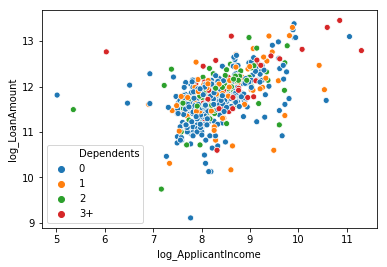

In [22]:
g = sns.scatterplot(x="log_ApplicantIncome", y="log_LoanAmount", hue="Dependents", data=train)

And let the violins play

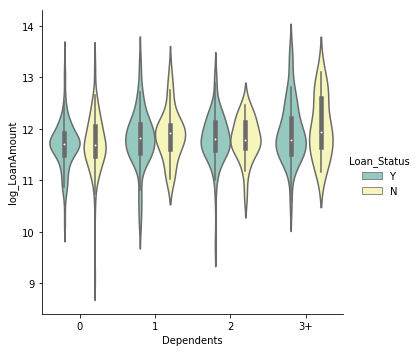

In [23]:
g = sns.catplot(x="Dependents", y="log_LoanAmount", data=train, kind="violin", hue="Loan_Status", palette="Set3")

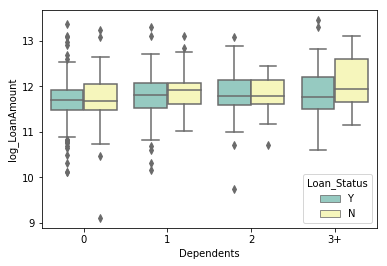

In [24]:
g = sns.boxplot(x="Dependents", y="log_LoanAmount", hue="Loan_Status", data=train, palette="Set3")

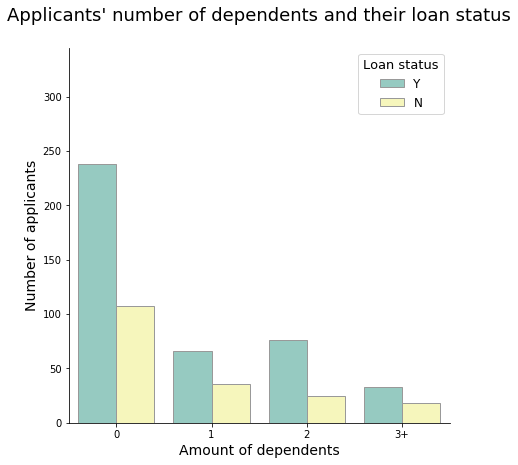

In [25]:
# Creates a Grouped barplot with the numbers of participants in different class standings and their origin
loan_status_dependents_count = sns.catplot(x='Dependents', hue='Loan_Status', kind="count",
                                            palette="Set3", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Applicants' number of dependents and their loan status\n", fontsize=18)
loan_status_dependents_count.set_xlabels('Amount of dependents', fontsize=14)
loan_status_dependents_count.set_ylabels('Number of applicants', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)
plt.ylim(0,train.Dependents.value_counts().max());

It seems like applicants with 2 dependents have a greater approval rate than the other ones.
Let's see the proportions with a chunck of code below!

In [26]:
zero_approved = train[(train.Dependents == '0') &  (train.Loan_Status == 'Y')]
zero_denied = train[(train.Dependents == '0') &  (train.Loan_Status == 'N')]
one_approved = train[(train.Dependents == '1') &  (train.Loan_Status == 'Y')]
one_denied = train[(train.Dependents == '1') &  (train.Loan_Status == 'N')]
two_approved = train[(train.Dependents == '2') &  (train.Loan_Status == 'Y')]
two_denied = train[(train.Dependents == '2') &  (train.Loan_Status == 'N')]
three_plus_approved = train[(train.Dependents == '3+') &  (train.Loan_Status == 'Y')]
three_plus_denied = train[(train.Dependents == '3+') &  (train.Loan_Status == 'N')]

approved = [len(zero_approved.index), len(one_approved.index), len(two_approved.index), len(three_plus_approved.index)]
denied = [len(zero_denied.index), len(one_denied.index), len(two_denied.index), len(three_plus_denied.index)]

for i in range(len(approved)):
 print('The proportion of approved applicants with {} dependents is {}'.format(i, approved[i]/(approved[i]+denied[i])))

The proportion of approved applicants with 0 dependents is 0.6898550724637681
The proportion of approved applicants with 1 dependents is 0.6470588235294118
The proportion of approved applicants with 2 dependents is 0.7524752475247525
The proportion of approved applicants with 3 dependents is 0.6470588235294118


Indeed! It seems that having 2 dependents helps with the application aproval process.
On the other hand, having 1 or 3+ dependents is very much the same.
It is important to note, however, that we have about the same number of observations for '1' and '2' dependents, but only half of that for '3+', so we should not confirm any correlations here.

### Education

Another categorical variable, but this time with no missing values! YAY!

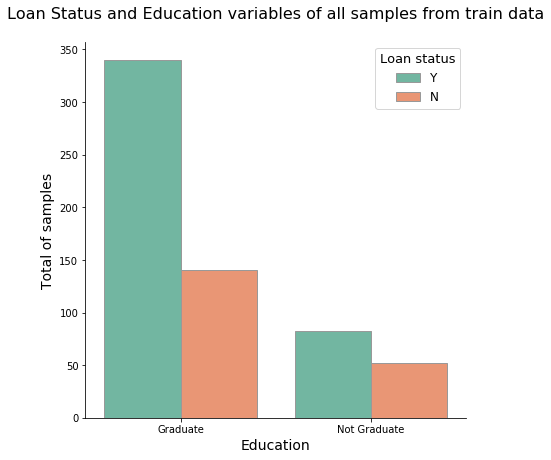

In [27]:
# Grouped barplot correlating Education and Loan_Status

loan_status_education_count = sns.catplot(x='Education', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Education variables of all samples from train data\n", fontsize=16)
loan_status_education_count.set_xlabels('Education', fontsize=14)
loan_status_education_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [28]:
graduate_approved = train[(train.Education == 'Graduate') &  (train.Loan_Status == 'Y')]
graduate_denied = train[(train.Education == 'Graduate') &  (train.Loan_Status == 'N')]
notgraduate_approved = train[(train.Education == 'Not Graduate') &  (train.Loan_Status == 'Y')]
notgraduate_denied = train[(train.Education == 'Not Graduate') &  (train.Loan_Status == 'N')]

graduate_rate = (len(graduate_approved.index) / (len(graduate_approved.index) + len(graduate_denied.index)))
notgraduate_rate = (len(notgraduate_approved.index) / (len(notgraduate_approved.index) + len(notgraduate_denied.index)))

print('The proportion of approved graduated applicants is %.2f and that of non-graduated applicants is %.2f' % (graduate_rate, notgraduate_rate))

The proportion of approved graduated applicants is 0.71 and that of non-graduated applicants is 0.61


From the calculations above, we can see that **there might be a correlation** between the an applicant's academic degree and their loan status decision by the company. Applicants who have an academic degree show a greater rate of approval than those who do not have one.

Now let's take a look in how much applicants request in their loans to seek for a correlation between these values and their loan status decision by the company.

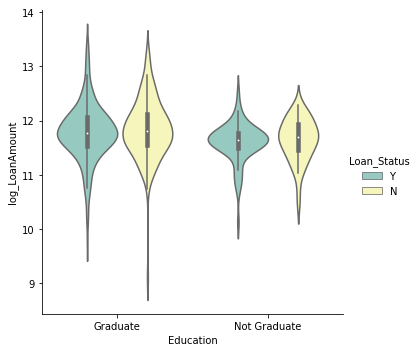

In [29]:
g = sns.catplot(x="Education", y="log_LoanAmount", hue="Loan_Status", data=train, kind="violin", palette="Set3")

It is noticeable that there _is not_ a big difference between the loan amount values for applicants that got accepted or rejected in any of the two "Education" subgroups. 

This implies that it is not the loan amount itself that creates the discrepancy of proportion rates we calculated above.

In fact, applicants who have an academic degree tend to ask for a _greater_ loan amount than those who do not.

However, what if graduate applicants tend to have higher income than those are not graduate? We've already seen that there is a positive correlation between the applicant's income and it's loan amount, which can also influence on the loan status decision.

According to the violin plot below, that is not the case. Applicants who are married and those who are not DO NOT have a relevant gap in their salaries.

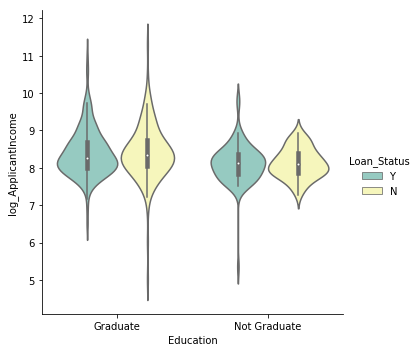

In [30]:
g = sns.catplot(x="Education", y="log_ApplicantIncome", hue="Loan_Status", data=train, kind="violin", palette="Set3")

Therefore, an applicant's _education_ **can be** a decisive factor for the company to either accept or reject someone's application.

### Self_Employed

This is another categorical variable with two possible values ('Yes'/'No'). However, life is not a bed of roses and, unlike the 'Education' variable, there are missing values in 'Self_Employed'. 32 to be more precise.

In [31]:
train.Self_Employed.isna().sum()

32

Besides, it is noticeable that a high percentage of all the aplicants are not self employed, that is, they work for someone else.

Note: The data description provided by Analytics Vidhya does not make clear if an applicant who claimed to be self employed truly works autonomously or is looking for a job, for example. So we will not make any assumptions regarding these possible situations.

In [32]:
train.Self_Employed.describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

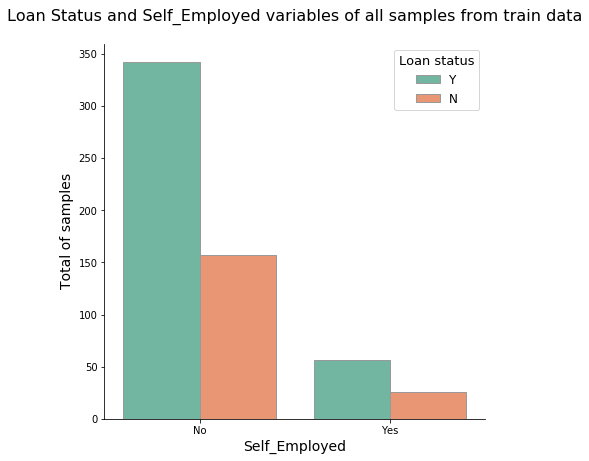

In [33]:
# Grouped barplot correlating Self_Employed and Loan_Status

loan_status_self_employed_count = sns.catplot(x='Self_Employed', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Self_Employed variables of all samples from train data\n", fontsize=16)
loan_status_self_employed_count.set_xlabels('Self_Employed', fontsize=14)
loan_status_self_employed_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [34]:
self_employed_approved = train[(train.Self_Employed == 'Yes') &  (train.Loan_Status == 'Y')]
self_employed_denied = train[(train.Self_Employed == 'Yes') &  (train.Loan_Status == 'N')]
not_self_employed_approved = train[(train.Self_Employed == 'No') &  (train.Loan_Status == 'Y')]
not_self_employed_denied = train[(train.Self_Employed == 'No') &  (train.Loan_Status == 'N')]

self_employed_rate = (len(self_employed_approved.index) / (len(self_employed_approved.index) + len(self_employed_denied.index)))
not_self_employed_rate = (len(not_self_employed_approved.index) / (len(not_self_employed_approved.index) + len(not_self_employed_denied.index)))

print('The proportion of approved self-employed applicants is %.2f and that of non-self-employed applicants is %.2f' % (self_employed_rate, not_self_employed_rate))

The proportion of approved self-employed applicants is 0.68 and that of non-self-employed applicants is 0.69


Let's also check the proportion for the applicants who have null values for this field:

In [35]:
null_self_employed = train[train['Self_Employed'].isnull()]
null_self_employed.sort_values(by='Loan_Status')

null_approved = null_self_employed[(null_self_employed.Loan_Status == 'Y')]
null_denied = null_self_employed[(null_self_employed.Loan_Status == 'N')]

null_rate = (len(null_approved.index) / (len(null_approved.index) + len(null_denied.index)))

print('The proportion of approved non-specified self-employed applicants is %.2f' % (null_rate))

# The data for the applicants that did not reveal their gender
# null_self_employed

The proportion of approved non-specified self-employed applicants is 0.72


The scatterplot below shows that most applicants are concentraded at about the same values for both self-employed and not self-employed, with a positive correlation between one's income and loan amount.

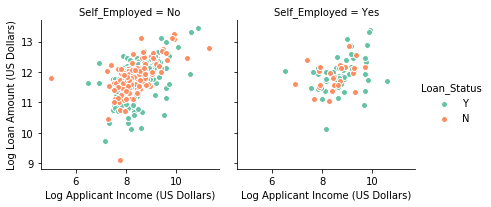

In [36]:
g = sns.FacetGrid(train, col="Self_Employed", hue="Loan_Status", palette="Set2")
g = g.map(plt.scatter, "log_ApplicantIncome", "log_LoanAmount", edgecolor="w").add_legend()
g.set_axis_labels("Log Applicant Income (US Dollars)", "Log Loan Amount (US Dollars)")

With the plot and the proportions presented above, we can see that the self-employment status of an applicant alone _does not_ seem to influence the company's decision to loan them money.

However, because we do not have much data on both self-employed applicants and those who had a null value for this variable, the analysis might not be very correct. This is a detail we shall pay more attention to in the future as we try to enhance our prediction model(s).

### Credit_History

In [37]:
# To make the data set more concise, let's transform the '1.0' values for the
#  'Credit_History' as a 'Yes' and the '0.0' values as a 'No' so to make it
#  a categorical variable.
train['Credit_History'] = train['Credit_History'].astype(object)
train['Credit_History'] = train['Credit_History'].replace([1, 0], ['Yes', 'No'])

# Quick look on the changes made
train['Credit_History'].head(10)

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6    Yes
7     No
8    Yes
9    Yes
Name: Credit_History, dtype: object

The definition given by Analytics Vidhya of this category is "credit history meets guidelines". We do not have further information on what these guidelines are or how an applicant's credit history is calculated, so let's just stick to the information we have, which is the "Yes/No" options.

Besides, this is the variable with the greatest amount of null values in the dataset, with a total of 50! Before we check for these values, some data exploration and visualisation with non-missing information might give us some good insight:

In [38]:
train.Credit_History.value_counts()

Yes    475
No      89
Name: Credit_History, dtype: int64

The difference in applicants with a positive credit history to those with a negative one is massive, more than 5 times.

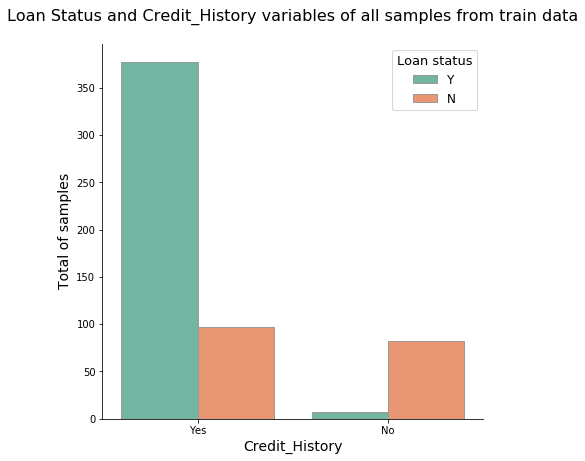

In [39]:
# Grouped barplot correlating Credit_History and Loan_Status

loan_status_credit_history_count = sns.catplot(x='Credit_History', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Credit_History variables of all samples from train data\n", fontsize=16)
loan_status_credit_history_count.set_xlabels('Credit_History', fontsize=14)
loan_status_credit_history_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [40]:
positive_credit_history_approved = train[(train.Credit_History == 'Yes') &  (train.Loan_Status == 'Y')]
positive_credit_history_denied = train[(train.Credit_History == 'Yes') &  (train.Loan_Status == 'N')]
negative_credit_history_approved = train[(train.Credit_History == 'No') &  (train.Loan_Status == 'Y')]
negative_credit_history_denied = train[(train.Credit_History == 'No') &  (train.Loan_Status == 'N')]

positive_credit_history_rate = (len(positive_credit_history_approved.index) / (len(positive_credit_history_approved.index) + len(positive_credit_history_denied.index)))
negative_credit_history_rate = (len(negative_credit_history_approved.index) / (len(negative_credit_history_approved.index) + len(negative_credit_history_denied.index)))

print('The proportion of approved applicants with a positive credit history is %.2f and that of applicants with a negative credit history is %.2f' % (positive_credit_history_rate, negative_credit_history_rate))

The proportion of approved applicants with a positive credit history is 0.80 and that of applicants with a negative credit history is 0.08


Now this is very interesting.

There is a _very strong_ correlation between an applicant's credit history status and the company's decision to loan this customer money or not.
It does make sense indeed as the company would probably not lend money to customers that do not meet its guidelines for getting a loan.

Before we work towards imputing data for the missing values in this category, let's see how the customers with a non-specified credit history do regarding getting their loans approved.

In [41]:
null_credit_history = train[train['Credit_History'].isnull()]
null_credit_history.sort_values(by='Loan_Status')

null_approved = null_credit_history[(null_credit_history.Loan_Status == 'Y')]
null_denied = null_credit_history[(null_credit_history.Loan_Status == 'N')]

null_rate = (len(null_approved.index) / (len(null_approved.index) + len(null_denied.index)))

print('The proportion of approved applicants with a non-specified credit history is %.2f.' % (null_rate))

# The data for the applicants that did not reveal their credit history
# null_credit_history

The proportion of approved applicants with a non-specified credit history is 0.74.


It seems that an applicant who does not specify if they meet the credit history guidelines have a higher chance of getting their loan approved than those who have a clear negative credit history background.

In order to automate the loan eligibility process, we should focus on identifying if a customer meets the guidelines or not. Leaving this field with unknown information will be disadvantageous for our task.

However, for the first attempt of this project, I will not input values for any missing data. I want to test how efficient the models will be without any imputation, whether it is a more direct one (like inputing the mode of a variable) or a more expensive one in terms of computation and time, such as applying a prediction model to a variable.

### Property_Area

In [42]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

We have a good amount of values for each of the 3 property area categories, without a big disparity of number of clients among them.

Besides, no NA values! :)

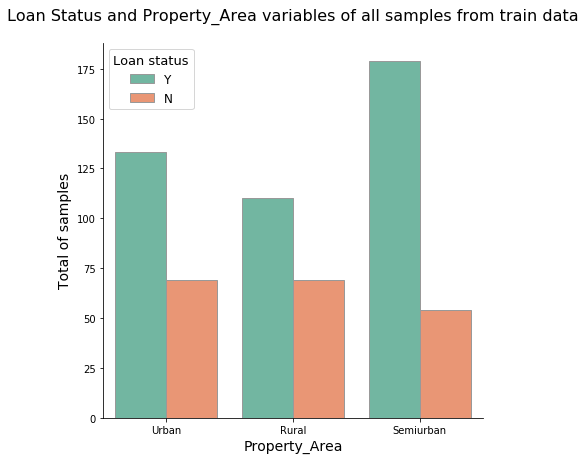

In [43]:
# Grouped barplot correlating Property_Area and Loan_Status

loan_status_property_area_count = sns.catplot(x='Property_Area', hue='Loan_Status', kind="count",
                                            palette="Set2", edgecolor=".6", height=6,
                                            legend=False, data=train);

# Set the labels for the x and y axis, the legend and the title
plt.title("Loan Status and Property_Area variables of all samples from train data\n", fontsize=16)
loan_status_property_area_count.set_xlabels('Property_Area', fontsize=14)
loan_status_property_area_count.set_ylabels('Total of samples', fontsize=14)
plt.legend(title='Loan status', fontsize=12,title_fontsize=13)

In [44]:
urban_approved = train[(train.Property_Area == 'Urban') &  (train.Loan_Status == 'Y')]
urban_denied = train[(train.Property_Area == 'Urban') &  (train.Loan_Status == 'N')]
rural_approved = train[(train.Property_Area == 'Rural') &  (train.Loan_Status == 'Y')]
rural_denied = train[(train.Property_Area == 'Rural') &  (train.Loan_Status == 'N')]
semiurban_approved = train[(train.Property_Area == 'Semiurban') &  (train.Loan_Status == 'Y')]
semiurban_denied = train[(train.Property_Area == 'Semiurban') &  (train.Loan_Status == 'N')]

urban_rate = (len(urban_approved.index) / (len(urban_approved.index) + len(urban_denied.index)))
rural_rate = (len(rural_approved.index) / (len(rural_approved.index) + len(rural_denied.index)))
semiurban_rate = (len(semiurban_approved.index) / (len(semiurban_approved.index) + len(semiurban_denied.index)))

print('The proportion of approved applicants from urban property areas is %.2f; that of applicants from rural areas is %.2f and that of applicants from semiurban areas is %.2f' % (urban_rate, rural_rate, semiurban_rate))

The proportion of approved applicants from urban property areas is 0.66; that of applicants from rural areas is 0.61 and that of applicants from semiurban areas is 0.77


After analysing the Credit_History variable and understanding how impactful it is on the loan decision model, let's see if there is a correlation between that information and an applicant's property area. Maybe that can give us further insight on the different rates of approval for the three different property area categories.

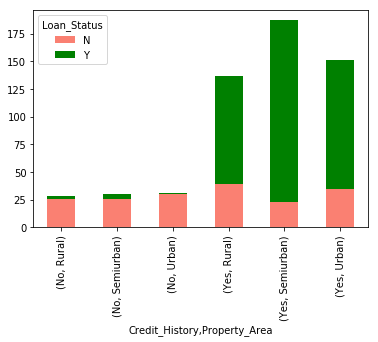

In [51]:
ax = pd.crosstab([train['Credit_History'], train['Property_Area']], train['Loan_Status'])
ax.plot(kind='bar', stacked=True, color=['salmon','green'], grid=False)

In [46]:
contingency_table = pd.crosstab(
    train['Credit_History'],
    train['Property_Area'],
    margins=True,
)
contingency_table

Property_Area,Rural,Semiurban,Urban,All
Credit_History,,,,
No,28,30,31,89
Yes,137,187,151,475
All,165,217,182,564


Note: The reason why the total number of applicants from a certain property area in the contigency table above differs from that shown on the 'value_counts' function. E.g. for the rural population, we have a total of 179 applicants according to value_counts(), but the contigency table gives us 165.

This happens because the contigency table only shows applicants that *DO NOT* have a null value for the Credit_History variable. That is, the applicants whose credit history situation is unknown are excluded from the contigency table and therefore not included in it.

As we can see, a huge percentage of applicants who had a negative credit history also did not get their loan request approved. Their property area does not have to seem a big influence on this.

On the other hand, applicants who had a positive credit history experienced different outcomes. Those from semiurban areas had a higher approval rate than those from urban or rural areas.

Therefore, the location of one's property _can be_ an important factor on the company's decision to approve or decline a loan request. The applicant's credit history situation seems to be the most important factor nevertheless.

### CREATE A 'TotalIncome' variable in the beginning then analyse it here

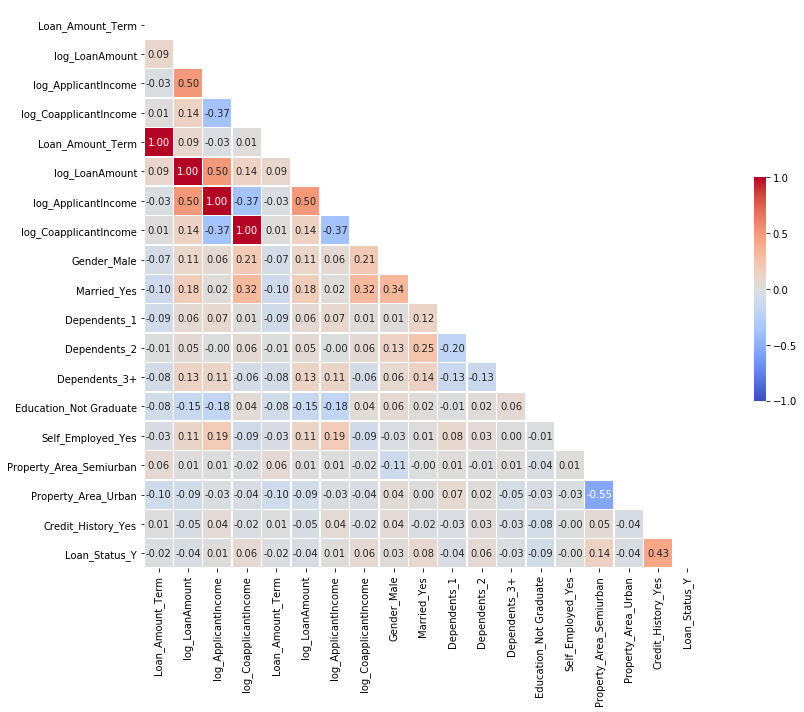

In [47]:
# Heatmap correlation matrix between all variables using Pearson's corr coefficient
train_dummy = pd.get_dummies(train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status'], drop_first=True)
train_concat = pd.concat([train, train_dummy], axis = 1)
#train_concat.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1, inplace=True)
corr_matrix = train_concat.corr()

# Set up mask to hide the upper triangle (same information as the bottom one)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Setup
fig, ax = plt.subplots(figsize=(15, 10))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, mask=mask, square=True, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5,
            cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]}, # Shrink the legend size and label tick marks at [-1, -.5, 0, 0.5, 1]
            vmin=-1, vmax=1) # Set min and max values for the color bar

# Rotates the column labes for the x-axis to make it more presentable
ax.set_xticklabels(corr_matrix.columns, rotation = 90)
ax.set_yticklabels(corr_matrix.columns)

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()

# corr_matrix

# Source: https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d